In [28]:
import datetime
import itertools
import os

def to_dates_count(x, y):
    return dict(log_date=x, number_of=len(list(y)))


def to_group_counter(x, y):
    groupList = list(y)
    return x, sum(map(lambda x, y: y, groupList))


def group_by_date_and_count(x):
    grouped = itertools.groupby(x, lambda x, _: x)
    return map(lambda x, y: to_group_counter(x, y), grouped)

rootPath = '../../dataset/'
aggregated = []

for filename in os.listdir(rootPath):
    if filename.endswith('.log'):
        filepath = rootPath + filename
        f = open(filepath, "r+")
        allLines = f.readlines()
        loggingLevels = ['INFO', 'DEBUG', 'TRACE', 'ERROR']
        filteredLines = []
        parsedDates = []
        for line in allLines:
            if any(line.startswith(x) for x in loggingLevels):
                filteredLines.append(line)
                splittedLine = line.split(None, 3)
                if splittedLine[1] != '' and splittedLine[2] != '':
                    date = splittedLine[1] + splittedLine[2]
                    parsedDate = datetime.datetime.strptime(date, '%Y-%m-%d%H:%M:%S.%f')
                    parsedDates.append(parsedDate)
        aggregated.extend(parsedDates)

grouped = itertools.groupby(aggregated, lambda x: x.date())
count_per_day = [*map(lambda x: to_dates_count(*x), grouped)]
count_per_day.sort(key=lambda x: x["log_date"])
aggregated_dates = [x["log_date"] for x in count_per_day]

In [29]:
%matplotlib inline

import matplotlib.dates as mdates
import matplotlib.pyplot as plt

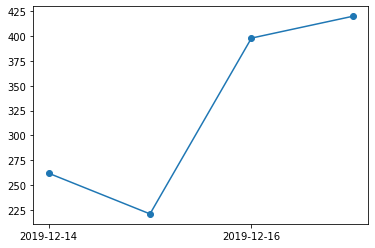

In [31]:
mat_dates = mdates.date2num(aggregated_dates)
mat_values = [x["number_of"] for x in count_per_day]
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.plot_date(mat_dates, mat_values, '-o')